In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from c19_load import load_single_country

In [2]:
# Ingest
CTRY = 'Singapore'
df_sg = load_single_country(country=CTRY)

# t_s100: Days after 100 cases have surpassed
# t_s100 = 0 when no. of cases exceed 100, -1 before this date
t_100cases = df_sg[df_sg.total>100].index.min()
df_sg['t'] = df_sg.index
df_sg['t_s100'] = df_sg['t'].apply(lambda x: x-t_100cases)
df_sg['t_s100'] = df_sg['t_s100'].apply(lambda x: x if x>=0 else -1)

df_sg['total_pct_change'] = df_sg['total'].pct_change()
df_sg['total_pct_change'] = df_sg['total_pct_change'].fillna(0.0)
df_sg['total_pct_change'] = df_sg['total_pct_change'].replace(float('inf'), 0.0)
# total_pct_change_rolling_mean: rolling mean (7 lags) of pct_change in cases
df_sg['total_pct_change_rolling_mean'] = df_sg['total_pct_change'].rolling(7).mean()
df_sg['total_pct_change_rolling_mean'] = df_sg['total_pct_change_rolling_mean'].fillna(0.0)

# Settings
NEW__COLNAME = 'new'
CONFIRMED__COLNAME = 'total'
ACTIVE__COLNAME = 'active'
DISCHARGED__COLNAME = 'discharged'

M = df_sg['total_pct_change_rolling_mean'].mean()  

LAST_DAYS = 30

In [3]:
# Notes
annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE \nNews updates by CNA\nbryan.blackbee', 
    xy=(0.05, 0.03), xycoords='figure fraction', fontsize=10)
note1text = "2020-01-23: First case detected"
note2text = "2020-02-07: Dorscon Orange Declared"
note3text = "2020-04-07: Circuit Breaker Begins"
note4text = "2020-04-21: Circuit Breaker Tighter Measures Start"
note5text = "2020-05-05: Circuit Breaker 2 Begins"

In [4]:
# For testing
display(df_sg.head(2))
display(df_sg.tail(10))

,country,date,total,new,deaths,discharged,active,t,t_s100,total_pct_change,total_pct_change_rolling_mean
0,Singapore,2020-01-22,0,0,0,0,0,0,-1,0.0,0.0
1,Singapore,2020-01-23,1,1,0,0,1,1,-1,0.0,0.0


,country,date,total,new,deaths,discharged,active,t,t_s100,total_pct_change,total_pct_change_rolling_mean
88,Singapore,2020-04-19,6588,596,11,768,5809,88,50,0.099466,0.146843
89,Singapore,2020-04-20,8014,1426,11,801,7202,89,51,0.216454,0.155987
90,Singapore,2020-04-21,9125,1111,11,839,8275,90,52,0.138632,0.159440
91,Singapore,2020-04-22,10141,1016,12,896,9233,91,53,0.111342,0.155710
92,Singapore,2020-04-23,11178,1037,12,924,10242,92,54,0.102258,0.142202
93,Singapore,2020-04-24,12075,897,12,956,11107,93,55,0.080247,0.133562
94,Singapore,2020-04-25,12693,618,12,1002,11679,94,56,0.051180,0.114226
95,Singapore,2020-04-26,13624,931,12,1060,12552,95,57,0.073348,0.110495
96,Singapore,2020-04-27,14423,799,14,1095,13314,96,58,0.058647,0.087951
97,Singapore,2020-04-28,14951,528,14,1128,13809,97,59,0.036608,0.073376


In [5]:
# Generate values for date ranges
x = np.arange(df_sg.shape[0])
df2 = pd.DataFrame({'x' : x, 'y' : 0})

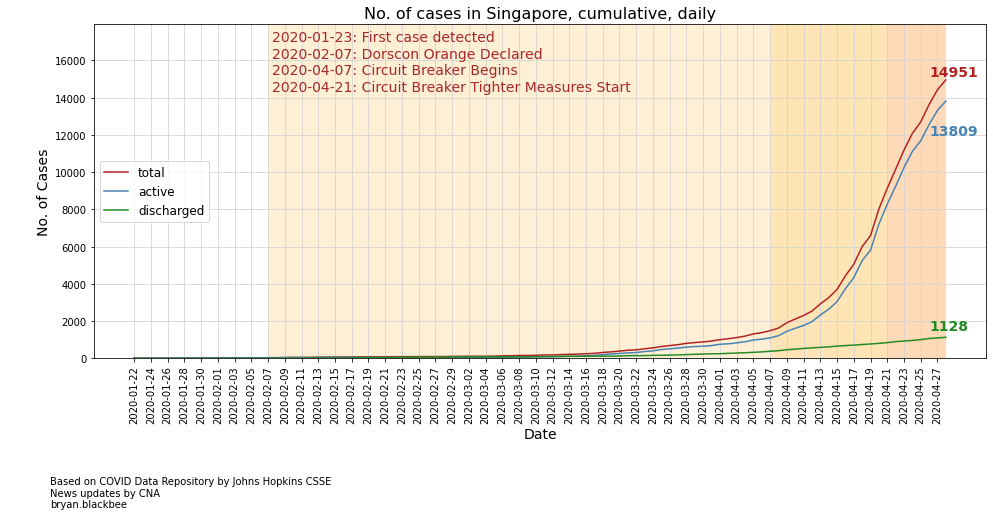

In [6]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)

# Calculations before plotting
ylim_max = df_sg[CONFIRMED__COLNAME].max() * 1.2

# Plot SG statistics
df_sg.plot(kind='line', x='date', y=CONFIRMED__COLNAME, ax=ax, color='FIREBRICK')
df_sg.plot(kind='line', x='date', y=ACTIVE__COLNAME, ax=ax, color='STEELBLUE')
df_sg.plot(kind='line', x='date', y=DISCHARGED__COLNAME, ax=ax, color='FORESTGREEN')
df2.plot(kind='line', x='x', y='y', ax=ax, linewidth=0)

# Axes
ax.set_xlabel("Date", fontsize=14)
ax.set_xticks(range(0,df_sg.shape[0],2))
ax.set_xticklabels(df_sg['date'].iloc[::2],rotation=90)
ax.set_ylim(0, ylim_max)
ax.set_ylabel("No. of Cases", fontsize=14)

# DORSCON Orange
do_index = df_sg[df_sg.date=='2020-02-07'].index[0]
ax.fill_between([do_index,x.max()], 0, ylim_max, facecolor='PAPAYAWHIP')
# Circuit Breaker
ckr_index = df_sg[df_sg.date=='2020-04-07'].index[0]
ax.fill_between([ckr_index,x.max()], 0, ylim_max, facecolor='MOCCASIN')
# Circuit Breaker Tighter Measures
eckr_index = df_sg[df_sg.date=='2020-04-21'].index[0]
ax.fill_between([eckr_index,x.max()], 0, ylim_max, facecolor='PEACHPUFF')

l_cfm = df_sg.tail(1)[CONFIRMED__COLNAME].tolist()
for i, v in enumerate(l_cfm):
    ax.text(df_sg.index.max()-2, v+200, str(v), fontsize=14, fontweight='bold', color='FIREBRICK')
    
l_lv = df_sg.tail(1)[ACTIVE__COLNAME].tolist()
for i, v in enumerate(l_lv):
    ax.text(df_sg.index.max()-2, v-1800, str(int(v)), fontsize=14, fontweight='bold', color='STEELBLUE')
    
l_rec = df_sg.tail(1)[DISCHARGED__COLNAME].tolist()
for i, v in enumerate(l_rec):
    ax.text(df_sg.index.max()-2, v+400, str(int(v)), fontsize=14, fontweight='bold', color='FORESTGREEN')

# Grid & Legend
ax.grid(color='LIGHTGRAY')
ax.legend([CONFIRMED__COLNAME, ACTIVE__COLNAME, DISCHARGED__COLNAME], fontsize=12, loc=6)

# Text & Annotations
ax.set_title("No. of cases in {}, cumulative, daily".format(CTRY), fontsize=16)
ax.text(do_index+0.5, ylim_max*0.95-0.15,note1text, fontsize=14, color="BROWN")
ax.text(do_index+0.5, ylim_max*0.90-0.15,note2text, fontsize=14, color="BROWN")
ax.text(do_index+0.5, ylim_max*0.85-0.15,note3text, fontsize=14, color="BROWN")
ax.text(do_index+0.5, ylim_max*0.80-0.15,note4text, fontsize=14, color="BROWN")
ax.annotate(**annotate_kwargs)
plt.subplots_adjust(bottom=0.30)
plt.show()

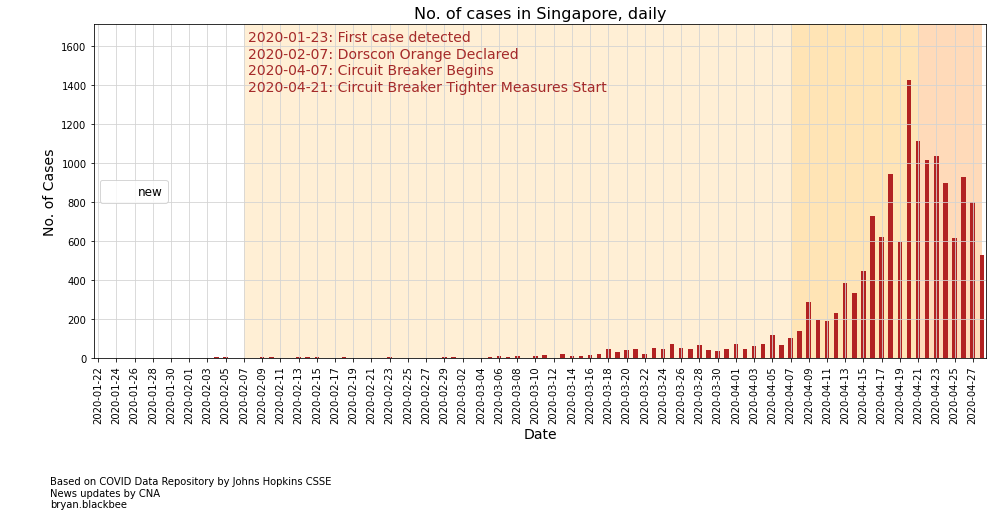

In [7]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)

# Calculations before plotting
ylim_max = df_sg[NEW__COLNAME].max() * 1.2

# Plot SG statistics
df_sg.plot(kind='bar', x='date', y=NEW__COLNAME, ax=ax, color='FIREBRICK')
df2.plot(kind='line', x='x', y='y', ax=ax, linewidth=0)

# Axes
ax.set_xlabel("Date", fontsize=14)
ax.set_xticks(range(0,df_sg.shape[0],2))
ax.set_xticklabels(df_sg['date'].iloc[::2],rotation=90)
ax.set_ylim(0, ylim_max)
ax.set_ylabel("No. of Cases", fontsize=14)

# DORSCON Orange
do_index = df_sg[df_sg.date=='2020-02-07'].index[0]
ax.fill_between([do_index,x.max()], 0, ylim_max, facecolor='PAPAYAWHIP')
# Circuit Breaker
ckr_index = df_sg[df_sg.date=='2020-04-07'].index[0]
ax.fill_between([ckr_index,x.max()], 0, ylim_max, facecolor='MOCCASIN')
# Circuit Breaker Tighter Measures
ckr_index = df_sg[df_sg.date=='2020-04-21'].index[0]
ax.fill_between([ckr_index,x.max()], 0, ylim_max, facecolor='PEACHPUFF')

# Grid & Legend
ax.grid(color='LIGHTGRAY')
ax.legend([NEW__COLNAME,], fontsize=12, loc=6)

# Text & Annotations
ax.set_title("No. of cases in {}, daily".format(CTRY), fontsize=16)
ax.text(do_index+0.5, ylim_max*0.95-0.15,note1text, fontsize=14, color="BROWN")
ax.text(do_index+0.5, ylim_max*0.90-0.15,note2text, fontsize=14, color="BROWN")
ax.text(do_index+0.5, ylim_max*0.85-0.15,note3text, fontsize=14, color="BROWN")
ax.text(do_index+0.5, ylim_max*0.80-0.15,note4text, fontsize=14, color="BROWN")
ax.annotate(**annotate_kwargs)
plt.subplots_adjust(bottom=0.30)
plt.show()

In [ ]:
###

fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.tail(LAST_DAYS).plot(kind='line', x='date', y=CONFIRMED__COLNAME, ax=ax, marker='x', color='FIREBRICK')
df_sg.tail(LAST_DAYS).plot(kind='line', x='date', y=ACTIVE__COLNAME, ax=ax, marker='x', color='STEELBLUE')
df_sg.tail(LAST_DAYS).plot(kind='line', x='date', y=DISCHARGED__COLNAME, ax=ax, marker='x', color='FORESTGREEN')

# x & y axes
ax.set_xticks(df_sg.head(LAST_DAYS).index)
ax.set_xticklabels(df_sg.tail(LAST_DAYS)['date'], rotation=90)
ax.set_xlabel("Date", fontsize=14)

ylim_max = int(df_sg.tail(LAST_DAYS)[CONFIRMED__COLNAME].max() * 1.1)

ax.set_ylim(0, ylim_max)
ax.set_ylabel("No. of Cases", fontsize=14)
ax.grid(color='GAINSBORO')
ax.legend([CONFIRMED__COLNAME, ACTIVE__COLNAME, DISCHARGED__COLNAME], fontsize=12, loc=6)

l_cfm = df_sg.tail(LAST_DAYS)[CONFIRMED__COLNAME].tolist()
for i, v in enumerate(l_cfm):
    ax.text(i-0.20, v+750, str(v), fontsize=10, fontweight='bold', color='FIREBRICK')
    
l_lv = df_sg.tail(LAST_DAYS)[ACTIVE__COLNAME].tolist()
for i, v in enumerate(l_lv):
    ax.text(i-0.20, max(0,v-1000), str(int(v)), fontsize=10, fontweight='bold', color='STEELBLUE')
    
    
l_rec = df_sg.tail(LAST_DAYS)[DISCHARGED__COLNAME].tolist()
for i, v in enumerate(l_rec):
    ax.text(i-0.20, v-55, str(int(v)), fontsize=10, fontweight='bold', color='FORESTGREEN')
    
ax.set_title("No. of cases in {}, cumulative, daily (last {} days)".format(CTRY, LAST_DAYS), fontsize=16)
plt.show()

In [ ]:
# Plotting growth rate history
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.plot(kind='line', x='t_s100', y='total_pct_change', ax=ax)
df_sg.plot(kind='line', x='t_s100', y='total_pct_change_rolling_mean', ax=ax)
ax.axhline(M, ls='--', color='k')

l_cfm = df_sg['total'].tail(1).tolist()
    
ax.set(#yscale='log',
       title="No. of cases in {}, cumulative, daily".format(CTRY),
       xlabel='Days from first 100 confirmed cases',
       ylabel='Daily percentage change')
ax.grid(color='GAINSBORO')
ax.annotate(**annotate_kwargs)
plt.show()


Sources: 

[Singapore confirms first case of Wuhan virus](https://www.channelnewsasia.com/news/singapore/wuhan-virus-pneumonia-singapore-confirms-first-case-12312860) Retrieved 23 Jan 2020

[Coronavirus outbreak: Singapore raises DORSCON level to Orange; schools to suspend inter-school, external activities](https://www.channelnewsasia.com/news/singapore/wuhan-coronavirus-dorscon-orange-singapore-risk-assessment-12405180) Retrieved 07 Feb 2020

[Most workplaces to close for one month from Apr 7 to curb spread of COVID-19](https://www.channelnewsasia.com/news/singapore/covid19-workplaces-close-april-one-month-12606684) Retrieved 03 Apr 2020

[COVID-19 circuit breaker extended until Jun 1 as Singapore aims to bring down community cases ‘decisively’: PM Lee](https://www.channelnewsasia.com/news/singapore/covid-19-circuit-breaker-extended-june-pm-lee-speech-apr-21-12662054) Retrieved 21 Apr 2020